In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import geopandas as gpd

In [2]:
may = pd.read_pickle('../data/may.pkl')
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [3]:
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5


In [6]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
# promise_zones= promise_zones.to_crs('EPSG:4326')
print(promise_zones)

epsg:2274
   OBJECTID  ZONE_ID    SHAPE_STAr     SHAPE_STLe  \
0         1        1  1.053728e+08   49364.601403   
1         2        2  7.670585e+07   45226.018917   
2         3        3  2.985488e+08   75207.067487   
3         4        4  2.713638e+08   74348.596054   
4         5        5  3.928178e+08  106661.712102   
5         6        6  9.535996e+07   59256.923574   

                                            geometry  
0  POLYGON ((1743366.812 678044.543, 1743367.698 ...  
1  POLYGON ((1738690.545 661791.347, 1738733.644 ...  
2  POLYGON ((1759602.544 668309.889, 1759640.155 ...  
3  POLYGON ((1747799.003 654974.612, 1747821.293 ...  
4  POLYGON ((1737013.744 692634.639, 1737122.605 ...  
5  POLYGON ((1716935.654 667534.495, 1716992.481 ...  


<AxesSubplot:>

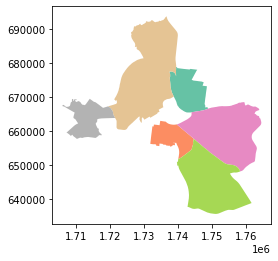

In [9]:
promise_zones.plot(cmap='Set2')

In [11]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [12]:
print(promise_zones.loc[0, 'geometry'])

POLYGON ((1743366.812291667 678044.5425000042, 1743367.697500005 678044.5356249958, 1743447.46541667 678056.6558333337, 1743491.095833331 678089.0802083313, 1743559.364166662 678140.2435416728, 1743611.48041667 678163.5006249994, 1743695.287708327 678201.801458329, 1743777.13729167 678216.0904166698, 1743798.416250005 678220.2931250036, 1743904.743125007 678194.710833326, 1743994.282291666 678173.2637500018, 1744019.93020834 678170.1518750042, 1744101.891249999 678160.7779166698, 1744158.493125007 678153.7852083296, 1744197.998333335 678149.1095833331, 1744293.813541666 678137.8081250042, 1744328.00729166 678133.1743749976, 1744338.916458338 678131.9975000024, 1744384.317291662 678126.5483333319, 1744405.834583327 678123.4689583331, 1744469.799374998 678114.5995833278, 1744491.02458334 678111.8866666704, 1744570.04354167 678103.6283333302, 1744590.093958333 678101.6527083367, 1744689.458749995 678091.4170833379, 1744787.646041662 678081.5554166734, 1744806.811458334 678079.5864583403, 